# Memory and CPU Utilization over Time

In [1]:
library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)
library(reshape2)
library(nlme)

data_path <- "executions/simulated-account-services-1/9/privacy-result"

cpu_data <- read.csv(sprintf("%s/cpu-resources.csv", data_path), header = TRUE)
mem_data <- read.csv(sprintf("%s/mem-resources.csv", data_path), header = TRUE)


In [2]:
min_time <- min(mem_data$timestamp)
mem_data$timestamp <- (mem_data$timestamp - min_time)/1000/1000/1000
mem_data$heapUsedBytes <- mem_data$heapUsedBytes/1000/1000

n<-dim(mem_data)[1]
mem_data2 <- mem_data[with(mem_data, order(timestamp)),]
mem_data <- data.frame(mem_data2[floor(n/4):n,])

Warning message:
“Removed 38 rows containing non-finite values (stat_boxplot).”

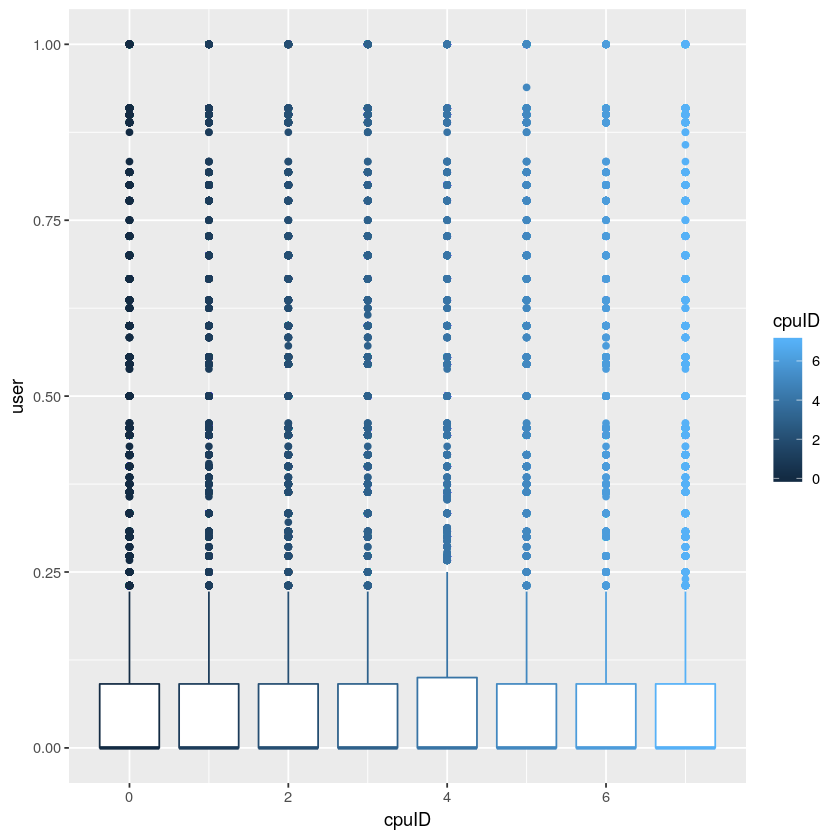

In [3]:
ggplot(cpu_data, aes(cpuID,user, group=cpuID, color=cpuID)) + geom_boxplot()

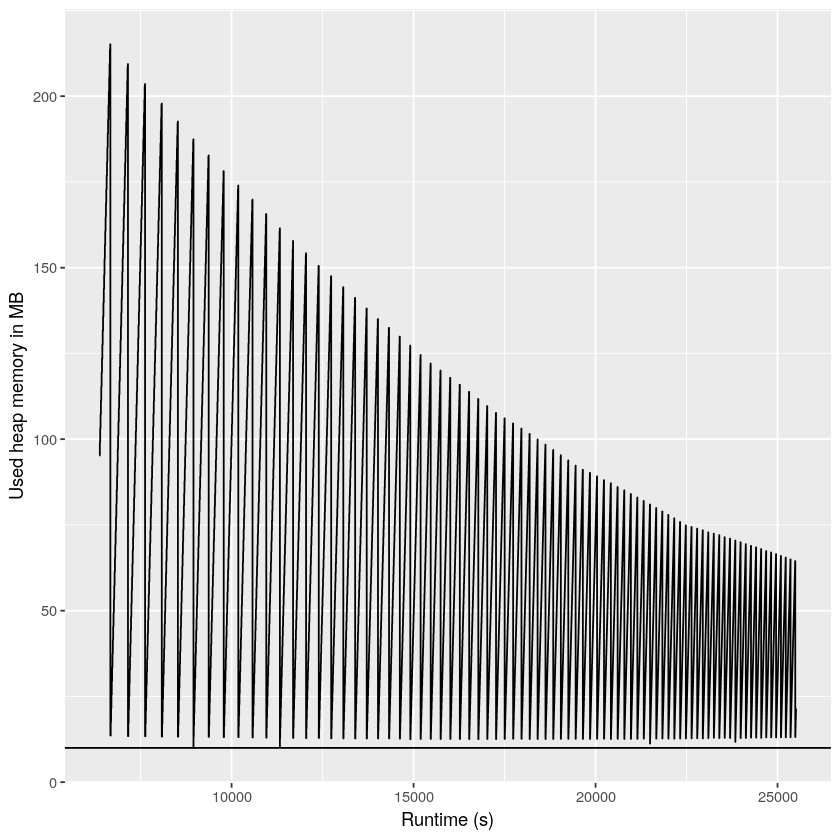

In [7]:
ggplot(mem_data, aes(timestamp, heapUsedBytes)) + 
    geom_line() + 
    geom_hline(yintercept = min(mem_data$heapUsedBytes)) + 
    labs(x="Runtime (s)", y="Used heap memory in MB") 

In [5]:
min(mem_data$heapUsedBytes)
max(mem_data$heapUsedBytes)

[1] 9.987032

[1] 215.1244

In [35]:
maxValues <- c()
meanValues <- c()
medianValues <- c()
window <- 20000
size <- length(mem_data$heapUsedBytes)
for (i in c(1:size)) {
    start <- i * (size-window)/size
    end <- start + window
    maxValues[[i]] <- max(mem_data$heapUsedBytes[start:end])
    meanValues[[i]] <- mean(mem_data$heapUsedBytes[start:end])
    medianValues[[i]] <- median(mem_data$heapUsedBytes[start:end])
}
    
mem_data$maxValues <- maxValues
mem_data$meanValues <- meanValues
mem_data$medianValues <- medianValues

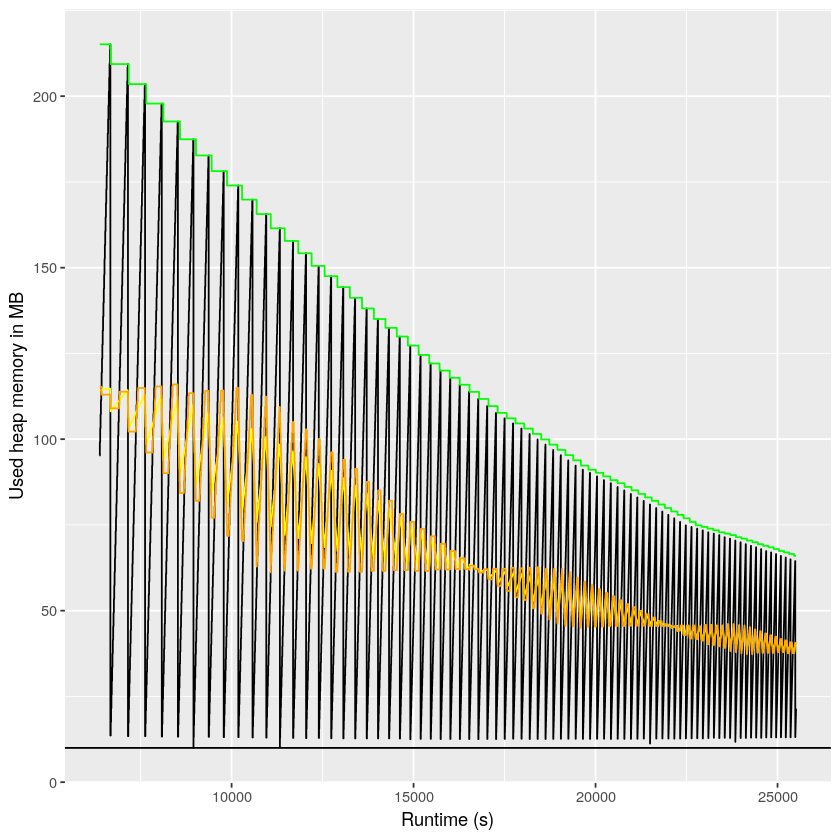

In [34]:
ggplot(mem_data, aes(timestamp, heapUsedBytes)) + 
    geom_line() + 
    geom_line(aes(y=maxValues), color="green") +
    geom_line(aes(y=meanValues), color="yellow") +
    geom_line(aes(y=medianValues), color="orange") +
    geom_hline(yintercept = min(mem_data$heapUsedBytes)) + 
    labs(x="Runtime (s)", y="Used heap memory in MB") 